In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

In [4]:
DATADIR = '../../Images'
CATEGORIES = []

for folder in os.listdir(DATADIR):
    if folder == '.DS_Store':
        continue
#    os.rename("{}/{}".format(DATADIR, folder), "{}/{}".format(DATADIR, folder[10:]))
#    folder = folder[10:]
    CATEGORIES.append(folder)


In [25]:
#DATADIR = '/Users/alex/Downloads/kagglecatsanddogs_3367a/PetImages'
#CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path for cats & dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

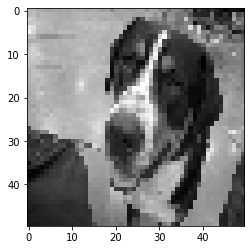

In [26]:
IMG_SIZE = 50 
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [27]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path for cats & dogs dir
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])

            except Exception as e:
                pass

create_training_data()

In [28]:
print(len(training_data))

20580


In [29]:
import random
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

10
24
58
55
13
28
65
77
100
25


In [30]:
x = []
y = []

In [31]:
for features, label in training_data:
    print(label)
    x.append(features)
    y.append(label)


x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1 parceque grayscale sinon 3 (r,g,b)


26
43
53
33
52
111
97
58
27
25
30
116
0
60
69
25
114
66
93
52
19
48
54
75
66
84
47
34
112
34
80
103
95
35
80
37
58
15
52
19
17
64
31
72
80
118
63
3
100
102
21
69
16
2
16
69
24
43
11
32
97
19
4
25
65
72
57
34
77
87
97
66
61
1
65
4
85
93
13
32
109
16
14
70
44
12
69
46
3
114
83
108
38
18
28
108
5
69
63
14
93
49
2
13
2
93
45
57
48
1
70
97
114
35
19
87
11
26
20
83
8
28
107
14
47
107
51
8
29
17
51
104
51
101
80
52
41
115
36
86
88
87
79
100
4
12
15
3
41
111
76
105
99
73
62
27
86
23
77
32
47
6
5
1
1
108
8
8
72
13
24
26
19
74
67
37
84
27
107
86
16
37
13
14
57
109
3
36
89
29
45
75
33
94
42
21
90
18
25
66
76
23
11
55
102
6
105
1
85
41
108
5
118
27
4
30
86
114
87
102
9
90
69
12
18
51
113
114
51
76
116
114
18
59
3
111
63
107
94
7
48
79
80
17
90
8
83
40
92
2
70
40
59
13
108
22
41
44
69
14
22
98
68
2
46
11
15
56
11
13
64
58
90
26
11
21
2
58
13
115
117
45
21
90
26
79
48
53
23
35
79
19
68
52
65
59
37
69
29
46
35
75
102
25
11
113
98
91
14
81
94
62
3
45
84
56
111
116
60
45
35
59
117
91
114
85
50
74
21
27

In [32]:
import pickle

pickle_out = open('../X.pickle', 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open('../Y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

# pickle_in = open('X.pickle', 'rb')
# x = pickle.load(pickle_in)